<a href="https://colab.research.google.com/github/avinashjairam/avinashjairam.github.io/blob/master/Titantic_Dataset_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

Goal: What factors enabled some passengers to survive this disaster? We can use a machine learning algorithm to 'learn' which features are relevant to the survivors.

In [65]:
titanic = pd.read_csv('https://raw.githubusercontent.com/avinashjairam/avinashjairam.github.io/master/titanic.csv')

Taking a peek at the dataset

Column Information
 

*   Passenger Id : A reference number/unique identifer given to each
*   Survived:  1 - passenger suvived, 0 - passenger did not survive
*   Pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
*   Name: Name of the passenger
*   Sex : Sex
*   Age : age in years
*   SibSp : Number of siblings / spouses aboard the Titanic
*   Parch:  # of parents / children aboard the Titanic
*   Ticket : Ticket number/Passenger fare/Cabin number
*   Embarked : Port of Departure- C = Cherbourg, Q = Queenstown, S = Southampton










In [66]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Learning about our data

In [67]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


What data types do we have?

In [68]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Looking at the shape of our dataset - It has 891 rows and 12 columns


In [69]:
titanic.shape

(891, 12)

Do you want to see a list of all columns?

In [70]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Looking at the description stats of the dataset

In [71]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


How many passengers survived? We can use a countplot from seaborn to find out.

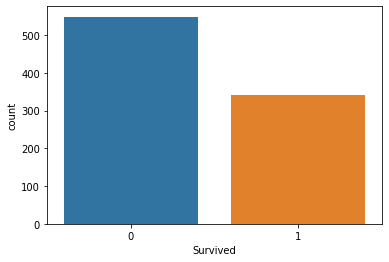

In [72]:
sns.countplot(x='Survived', data = titanic)

How many males vs females survived? We can use the hue parameter within seaborn to display this.

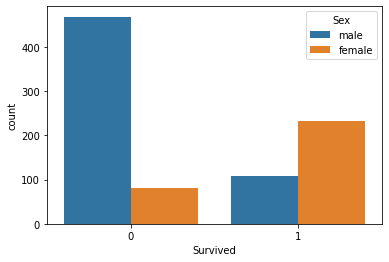

In [73]:
sns.countplot(x='Survived', data = titanic, hue = 'Sex')

This is an imperfect dataset. That is, we have several missing values.

Let's check for null or missing values.

In [74]:
titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


How many data values are missing for each column? We add the sum() method to the above code to find out.

In [75]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Generate a heatmap to visualize the null values

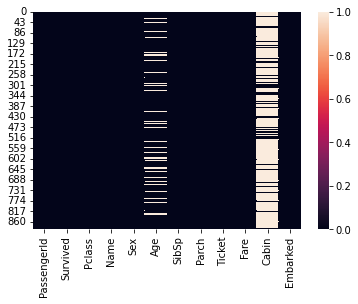

In [76]:
sns.heatmap(titanic.isna())

If a column contains > 30% of missing data, then such could be problematic when fitting our model!

Let's see how much data is missing in the Age and Cabin Columns.

The Age column - ~20% of the data is missing. We can fill this data with the mean.

In [77]:
titanic['Age'].isna().sum() / len(titanic['Age']) * 100

19.865319865319865

The Cabin column - 77% of the data is missing! We will discard this column later.

In [78]:
titanic['Cabin'].isna().sum() / len(titanic['Cabin'])  * 100

77.10437710437711

What is the distribution of the Ages? We can generate a seaborn distplot.

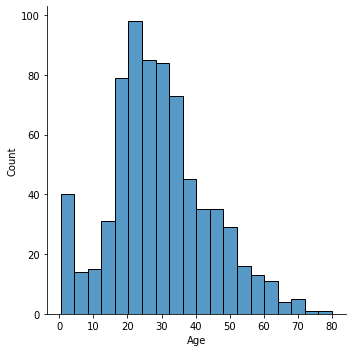

In [79]:
sns.displot(x='Age', data = titanic)

We will replacing the missing age values with the mean.

First, let's find the mean:

In [80]:
titanic['Age'].mean()

29.69911764705882

Now, let's replace the missing values (NaNs) using the filna() method

In [81]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

Verify that the change was made by checking how many Age values are still missing. We have 0!

In [82]:
titanic['Age'].isna().sum()

0

Let's generate another plot to check.We can see that the only column with missing data is now the 'Cabin' column. We will remove this from consideration.

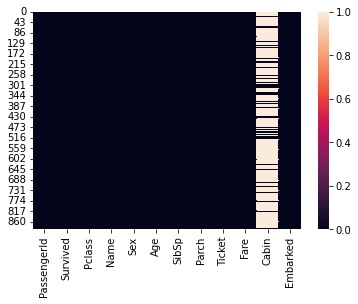

In [83]:
sns.heatmap(titanic.isna())

Dropping the cabin column

In [84]:
titanic.drop('Cabin', axis = 1, inplace = True) 

Verifying that the column was removed

In [85]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Generating another plot

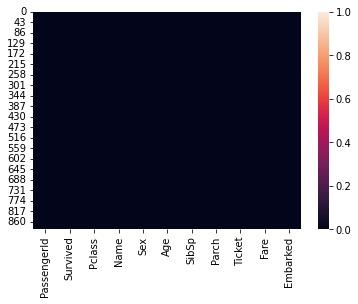

In [86]:
sns.heatmap(titanic.isna())

Mathematical models need numeric data as input. Hence, we need to convert the string data to a numeric format. 

For example, we will convert the sex column to a numerical format using a process called one-hot encoding.

The get_dummies() method generates two new columns 'female' and 'male' containing numerical values. 1 indicates TRUE and 0 indicates FALSE

In [87]:
pd.get_dummies(titanic['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Both columns tell us whether a passenger was a male or female. Hence, we don't need both. Let's remove the first column.

In [88]:
pd.get_dummies(titanic['Sex'], drop_first = True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


Now, let's overwrite the 'Sex' column with the new values listed above

In [89]:
titanic['Sex'] = pd.get_dummies(titanic['Sex'], drop_first = True)

Verifying that the change has been made

In [90]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C


What other columns we DO NOT need? The passengers' name, ticket number, and port of origin aren't relevant, so let's drop them.

In [91]:
titanic.drop(['Name', 'Ticket', 'Embarked'], axis = 1, inplace = True)

Verifying that the changes have been made.

In [92]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000
887,888,1,1,0,19.000000,0,0,30.0000
888,889,0,3,0,29.699118,1,2,23.4500
889,890,1,1,1,26.000000,0,0,30.0000


Separating of the features (independent variables or X) and the labels (dependent variables or y)

In [93]:
X = titanic[['PassengerId',	'Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare']]
y = titanic[['Survived']]

Data Modelling - Using Scikit Learn

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

#Importing Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [98]:
y_pred= lr.predict(X_test)

#TESTING





In [100]:
#Printing the Confusion Matrix
from sklearn.metrics import confusion_matrix

In [101]:
confusion_matrix(y_test, y_pred)

array([[154,  20],
       [ 31,  63]])

In [107]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,154,20
Actual Yes,31,63


#Generating the Classification Report

In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       174
           1       0.76      0.67      0.71        94

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.81      0.81      0.81       268

